| Field | Value |
|-|-|
| simulation file | sine_task_backprop.py |
| result files prefix | sine_task_backprop |
| # result files | 1\*1\*3\*3\*1\*1\*3 =  |
| simulation start | 2015-09-29 16:05:53 |
| simulation end | 2015-09-29 23:44:14 |
| duration | 7:38:21 |
| repository | https:/ |
| revision hash | [f7f911ae388a2904b4ba912b2a646ae8500c5699](https://tree/f7f911ae388a2904b4ba912b2a646ae8500c5699) |

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get(n_syn, cycle_dur, exc_level, g_S, alpha, beta, eps_factor):
    return cPickle.load(open('sine_task_backprop_n_syn_{0}_cycle_dur_{1}_exc_level_{2}_g_S_{3}_alpha_{4}_beta_{5}_eps_factor_{6}.p'.format(n_syn, cycle_dur, exc_level, g_S, alpha, beta, eps_factor),'rb'))


n_syn_s = [str(a) for a in [50]]
cycle_dur_s = [str(a) for a in [100]]
exc_level_s = [str(a) for a in [0.003, 0.005, 0.007]]
g_S_s = [str(a) for a in [0.0, 0.25, 0.5]]
alpha_s = [str(a) for a in [-50.0]]
beta_s = [str(a) for a in [0.35]]
eps_factor_s = [str(a) for a in [0.0005, 0.001, 0.002]]


params = list(product(n_syn_s, cycle_dur_s, exc_level_s, g_S_s, alpha_s, beta_s, eps_factor_s))

data = {tup:get(*tup) for tup in params}

In [4]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

/home/spicher/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
def show_plot(key,n_syn, cycle_dur, exc_level, g_S, alpha, beta, eps_factor,y_c,t_min,t_max):
    figure(figsize=(12,5))
    p = (n_syn, cycle_dur, exc_level, g_S, alpha, beta, eps_factor)
    curr = data[p][1][0]
    ts = curr.t
    mask = np.logical_and(ts>=t_min,ts<=t_max)
    if key=='y':
        plot(curr.t[mask],curr.res[key][mask,:int(y_c)+1])
    else:
        plot(curr.t[mask],curr.res[key][mask])


In [7]:
plt.style.use('ggplot')

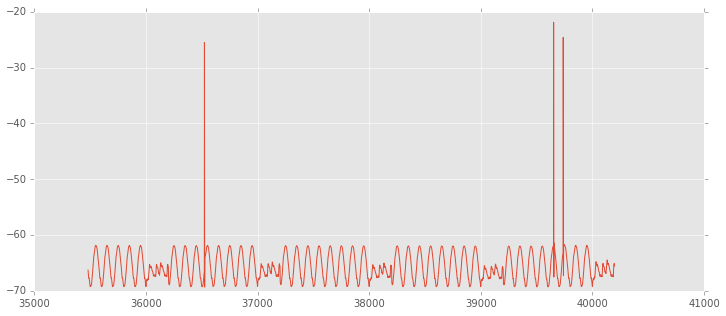

In [8]:
ts = data[params[0]][1][0].t
i = interact(show_plot,
key=widgets.ToggleButtons(description='key',options=['dendr_pred','weights','weight_updates', 'PIVs', 'y','h']),
t_min=(0,int(np.round(ts[-1]))),
t_max=(0,int(np.round(ts[-1]))),
n_syn=widgets.ToggleButtons(description='n_syn',options=n_syn_s),
cycle_dur=widgets.ToggleButtons(description='cycle_dur',options=cycle_dur_s),
exc_level=widgets.ToggleButtons(description='exc_level',options=exc_level_s),
g_S=widgets.ToggleButtons(description='g_S',options=g_S_s),
alpha=widgets.ToggleButtons(description='alpha',options=alpha_s),
beta=widgets.ToggleButtons(description='beta',options=beta_s),
eps_factor=widgets.ToggleButtons(description='eps_factor',options=eps_factor_s),
y_c=widgets.ToggleButtons(description='y_c',options=[str(a) for a in range(5)]))


(0, 2750)

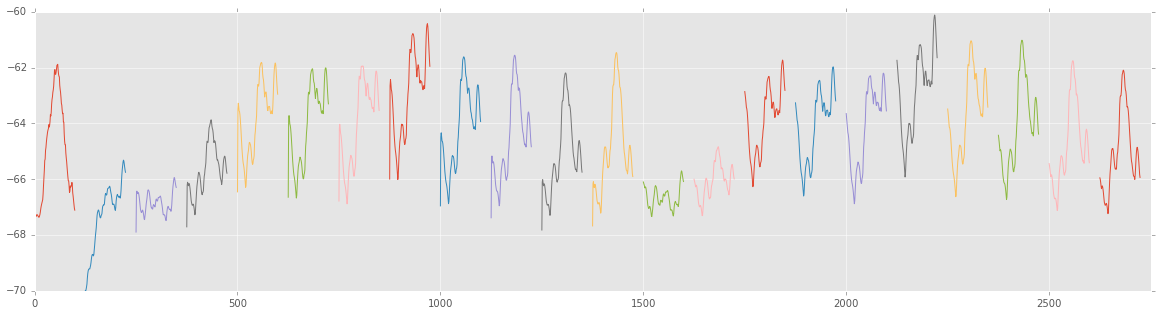

In [9]:
#p = (n_syn, cycle_dur, exc_level, g_S, alpha, beta, eps_factor)
p = params[0]
curr = data[p][1][0]
figure(figsize=(20,5))
cycle_pts = 100
eval_starts = np.concatenate((arange(0,41000,1000), arange(100,41000,1000)))
learn_starts = array([arange(st,st+800,100) for st in arange(200,40000,1000)]).flatten()
all_nudged = array([curr.res['y'][start:start+cycle_pts,0] for start in learn_starts])
target = np.mean(all_nudged,0)
plot(arange(cycle_pts), target)
analyze_evals = eval_starts[::4]
margin = 25
for idx, start in enumerate(analyze_evals):
    evals = curr.res['y'][start:start+cycle_pts,0]
    plot((idx+1)*(cycle_pts+margin) + arange(cycle_pts), evals)
ylim([-70,-60])
xlim([0, (len(analyze_evals)+1)*(cycle_pts+margin)])

In [10]:
def show_plot2(n_syn, cycle_dur, exc_level, g_S, alpha, beta, eps_factor):
    figure(figsize=(12,5))
    p = (n_syn, cycle_dur, exc_level, g_S, alpha, beta, eps_factor)
    curr = data[p][1][0]
    figure(figsize=(20,5))
    cycle_pts = 100
    eval_starts = np.concatenate((arange(0,41000,1000), arange(100,41000,1000)))
    learn_starts = array([arange(st,st+800,100) for st in arange(200,40000,1000)]).flatten()
    all_nudged = array([curr.res['y'][start:start+cycle_pts,0] for start in learn_starts])
    all_nudged[all_nudged < -70] = float('nan')
    all_nudged[all_nudged > -50] = float('nan')
    target = np.nanmean(all_nudged,0)
    plot(arange(cycle_pts), target)
    analyze_evals = eval_starts[::4]
    margin = 25
    for idx, start in enumerate(analyze_evals):
        evals = curr.res['y'][start:start+cycle_pts,0]
        plot((idx+1)*(cycle_pts+margin) + arange(cycle_pts), evals)
    yl = ylim()
    ylim([yl[0], min(yl[1], -40)])
    #ylim([-70,-60])
    xlim([0, (len(analyze_evals)+1)*(cycle_pts+margin)])
    xticks([])

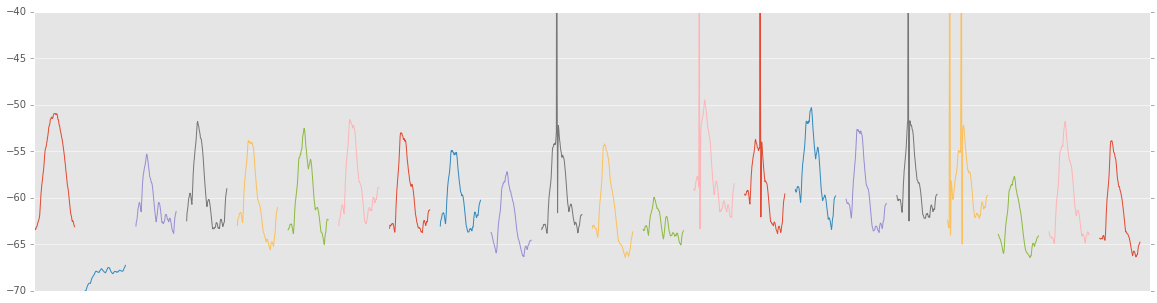

In [11]:
ts = data[params[0]][1][0].t
i = interact(show_plot2,
n_syn=widgets.ToggleButtons(description='n_syn',options=n_syn_s),
cycle_dur=widgets.ToggleButtons(description='cycle_dur',options=cycle_dur_s),
exc_level=widgets.ToggleButtons(description='exc_level',options=exc_level_s),
g_S=widgets.ToggleButtons(description='g_S',options=g_S_s),
alpha=widgets.ToggleButtons(description='alpha',options=alpha_s),
beta=widgets.ToggleButtons(description='beta',options=beta_s),
eps_factor=widgets.ToggleButtons(description='eps_factor',options=eps_factor_s))



In [88]:
arange(10)[::2]

array([0, 2, 4, 6, 8])

/home/spicher/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


([], <a list of 0 Text xticklabel objects>)

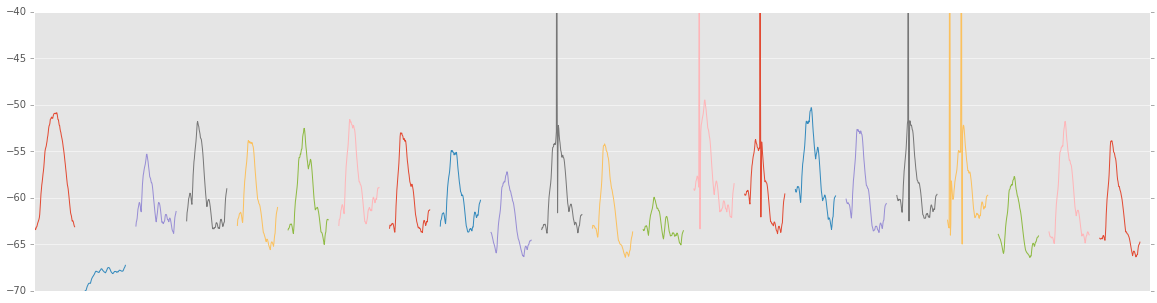

In [95]:
p = params[-1]
curr = data[p][1][0]
figure(figsize=(20,5))
cycle_pts = 100
eval_starts = np.concatenate((arange(0,41000,1000), arange(100,41000,1000)))
learn_starts = array([arange(st,st+800,100) for st in arange(200,40000,1000)]).flatten()
all_nudged = array([curr.res['y'][start:start+cycle_pts,0] for start in learn_starts])
all_nudged[all_nudged < -65] = float('nan')
all_nudged[all_nudged > -47] = float('nan')
target = np.nanmean(all_nudged,0)
plot(arange(cycle_pts), target)
analyze_evals = eval_starts[::4]
margin = 25
for idx, start in enumerate(analyze_evals):
    evals = curr.res['y'][start:start+cycle_pts,0]
    plot((idx+1)*(cycle_pts+margin) + arange(cycle_pts), evals)
yl = ylim()
ylim([yl[0], min(yl[1], -40)])
#ylim([-70,-60])
xlim([0, (len(analyze_evals)+1)*(cycle_pts+margin)])
xticks([])
